# <font color=#025dfa> Derin Öğrenme ile Kümeleme: Veri Madenciliği - Clustering with Deep Learning: Data Mining

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, veri madenciliği (DM) kapsamında derin öğrenme temelli kümeleme tekniklerini kullanarak veri setlerini anlamlandırmayı ve seçeneklerini hedeflemektedir. Farklı işlemlere sahip veri noktalarının benzerliklerine dayalı olarak gruplandırılması, gizli yapıların keşfedilmesine ve veri kümeleri Önemli ilişkilerin ortaya çıkmasına olanak sağlar. 

EN = This project aims to make sense of datasets and their options by using deep learning-based clustering techniques within the scope of data mining (DM). Grouping data points with different operations based on their similarities allows the discovery of hidden structures and the emergence of important relationships between datasets.

Kaynak/Source = https://www.kaggle.com/competitions/dmassignment1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
import warnings
warnings.filterwarnings('ignore')
import pickle
import joblib

from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('dataset.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,id,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,Sponsors,Tenancy Period,Plotsize,Age,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
0,id344,ad,12,c2,p3,2141,sacc2,time4,3,F0,G1,1,XL,35,PL3,H2,1,Jb3,1,yes,False,12.5246852367602,0.5868938062751,2.0
1,id949,ac,10,c4,p0,781,sacc1,time5,4,F0,G1,4,XL,?,PL3,H3,2,Jb3,1,no,False,4.10050935474222,0.734172716951736,0.0
2,id744,ad,24,c2,p3,3235,sacc3,time5,3,M0,G1,2,LA,26,PL3,H2,1,Jb4,1,no,False,17.7320722070928,1.5902564698525,0.0
3,id402,ad,36,c2,p2,3349,sacc1,time3,4,M1,G1,2,LA,28,PL3,H2,1,Jb4,1,no,False,18.8013966361558,3.0950888152523,0.0
4,id564,ad,10,c2,p2,2210,sacc1,time3,2,F0,G1,2,sm,25,PL1,H1,1,Jb2,1,yes,False,11.7797244405476,0.509442335186864,1.0


In [5]:
df.sample(5)

,id,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,Sponsors,Tenancy Period,Plotsize,Age,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
553,id932,aa,8,c4,p10,1164,sacc1,time5,3,F0,G1,4,XL,51,PL1,H3,2,Jb4,2,no,False,6.73007284059088,0.606914771660091,NaN
784,id689,aa,6,c2,p0,662,sacc1,time2,3,F0,G1,4,SM,41,PL3,H2,1,Jb2,2,no,False,3.80782103078094,0.888770851605339,NaN
110,id711,ab,36,c4,p1,5800,sacc1,time3,3,F0,G1,4,LA,34,PL3,H2,2,Jb3,1,no,False,31.2152736906331,2.94653758083377,0.0
118,id719,ab,13,c4,p3,882,sacc1,time2,4,F0,G3,4,SM,23,PL3,H2,2,Jb3,1,yes,False,3.79060220443849,1.29905535223757,0.0
751,id928,ab,18,c4,p9,1887,sacc5,time3,4,F1,G1,4,SM,28,PL1,H2,2,Jb3,1,yes,False,10.7548365129064,1.36474510480287,NaN


In [6]:
df.tail()

,id,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,Sponsors,Tenancy Period,Plotsize,Age,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
1026,id1026,aa,18,c2,p0,2249,sacc2,time4,4,F0,G1,3,LA,30,PL3,H2,1,Jb4,2,no,False,11.6543951298744,1.76691509076048,NaN
1027,id1029,ad,12,c2,p1,2445,sacc5,time2,2,F1,G1,4,LA,26,PL3,H1,1,Jb3,1,no,False,13.9809033269712,0.883258173945736,NaN
1028,id1028,ad,?,c2,p2,601,sacc1,time2,1,M1,G1,3,SM,23,PL3,H1,1,Jb2,2,yes,False,4.05552622566373,?,NaN
1029,id1027,ad,15,c2,p4,1262,sacc3,time4,4,F0,G1,3,ME,36,PL3,H2,2,Jb3,1,no,False,6.20046415610441,0.913622518176963,NaN
1030,id1022,ad,21,c3,p1,2993,sacc1,time3,3,F0,G1,2,sm,28,PL2,H2,2,Jb2,1,yes,False,15.3539681319652,1.47394608002731,NaN


In [7]:
df.tail()

,id,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,Sponsors,Tenancy Period,Plotsize,Age,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
1026,id1026,aa,18,c2,p0,2249,sacc2,time4,4,F0,G1,3,LA,30,PL3,H2,1,Jb4,2,no,False,11.6543951298744,1.76691509076048,NaN
1027,id1029,ad,12,c2,p1,2445,sacc5,time2,2,F1,G1,4,LA,26,PL3,H1,1,Jb3,1,no,False,13.9809033269712,0.883258173945736,NaN
1028,id1028,ad,?,c2,p2,601,sacc1,time2,1,M1,G1,3,SM,23,PL3,H1,1,Jb2,2,yes,False,4.05552622566373,?,NaN
1029,id1027,ad,15,c2,p4,1262,sacc3,time4,4,F0,G1,3,ME,36,PL3,H2,2,Jb3,1,no,False,6.20046415610441,0.913622518176963,NaN
1030,id1022,ad,21,c3,p1,2993,sacc1,time3,3,F0,G1,2,sm,28,PL2,H2,2,Jb2,1,yes,False,15.3539681319652,1.47394608002731,NaN


In [8]:
df.shape

(1031, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1031 non-null   object 
 1   Account1           1031 non-null   object 
 2   Monthly Period     1031 non-null   object 
 3   History            1031 non-null   object 
 4   Motive             1031 non-null   object 
 5   Credit1            1031 non-null   object 
 6   Account2           1031 non-null   object 
 7   Employment Period  1031 non-null   object 
 8   InstallmentRate    1031 non-null   object 
 9   Gender&Type        1031 non-null   object 
 10  Sponsors           1031 non-null   object 
 11  Tenancy Period     1031 non-null   object 
 12  Plotsize           1031 non-null   object 
 13  Age                1031 non-null   object 
 14  Plan               1031 non-null   object 
 15  Housing            1031 non-null   object 
 16  #Credits           1031 

In [10]:
df.isnull().sum().sort_values(ascending=False)

Class                856
Account1               0
Yearly Period          0
InstallmentCredit      0
Expatriate             0
Phone                  0
#Authorities           0
Post                   0
#Credits               0
Housing                0
Plan                   0
Age                    0
id                     0
Tenancy Period         0
Sponsors               0
Gender&Type            0
InstallmentRate        0
Employment Period      0
Account2               0
Credit1                0
Motive                 0
History                0
Monthly Period         0
Plotsize               0
dtype: int64

In [11]:
df.describe()

,#Credits,#Authorities,Class
count,1031.000000,1031.000000,175.000000
mean,1.408341,1.154219,0.937143
std,0.575460,0.361334,0.810522
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000
max,4.000000,2.000000,2.000000


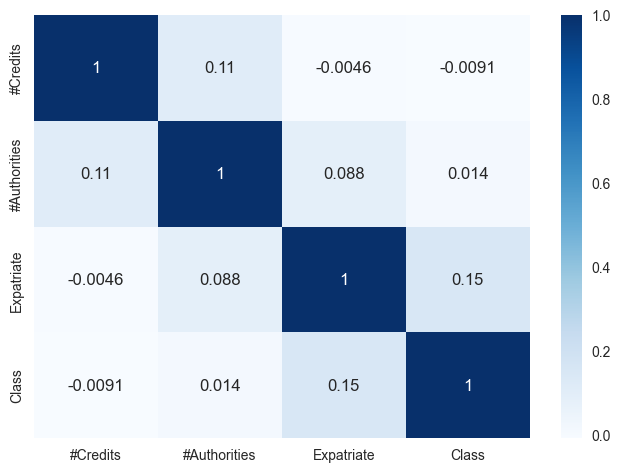

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [13]:
abs(df.corr(numeric_only=True)['Class']).sort_values(ascending=False)

Class           1.000000
Expatriate      0.152428
#Authorities    0.013645
#Credits        0.009105
Name: Class, dtype: float64

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [14]:
df=df.drop('id',axis=1)
df.head(1)

,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,Sponsors,Tenancy Period,Plotsize,Age,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
0,ad,12,c2,p3,2141,sacc2,time4,3,F0,G1,1,XL,35,PL3,H2,1,Jb3,1,yes,False,12.5246852367602,0.5868938062751,2.0


## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [15]:
df.columns = df.columns.str.replace(r'[\s\.]', '_', regex=True)
df.columns = df.columns.str.replace(r'Gender&Type', 'Gender_Type', regex=True)
df.columns = df.columns.str.replace(r'#', '', regex=True)

In [16]:
int_columns = df.select_dtypes(include=['int32','int64']).columns
# TR = İnt veri türündeki sütunları alır  
# EN = Selects columns with int data type

float_columns = df.select_dtypes(include=['float32','float64']).columns
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

num_columns = df.select_dtypes(include=['int32','int64','float32','float64']).columns
# TR = Veri setindeki tüm sayısal sütunları seçer
# EN = Selects all numeric columns in the dataset

object_columns = df.select_dtypes(include=['object']).columns
# TR = Object veri türündeki sütunları alır  
# EN = Selects columns with object data type

In [17]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


In [18]:
df.isnull().sum().sort_values(ascending=False)

Class                856
Age                    0
Yearly_Period          0
InstallmentCredit      0
Expatriate             0
Phone                  0
Authorities            0
Post                   0
Credits                0
Housing                0
Plan                   0
Account1               0
Monthly_Period         0
Tenancy_Period         0
Sponsors               0
Gender_Type            0
InstallmentRate        0
Employment_Period      0
Account2               0
Credit1                0
Motive                 0
History                0
Plotsize               0
dtype: int64

In [19]:
df[['Monthly_Period', 'Credit1', 'InstallmentRate', 'Tenancy_Period', 'Age', 'Credits', 'Authorities']] = df[['Monthly_Period', 'Credit1', 'InstallmentRate', 'Tenancy_Period', 'Age', 'Credits', 'Authorities']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df[['InstallmentCredit','Yearly_Period']]=df[['InstallmentCredit','Yearly_Period']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

In [20]:
for column in object_columns:
    df[column]=df[column].replace('?','Unknown')

In [21]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr)
df[num_columns] = imp.fit_transform(df[num_columns])
df['Class']=df['Class'].astype(int)
pd.DataFrame(df)

,Account1,Monthly_Period,History,Motive,Credit1,Account2,Employment_Period,InstallmentRate,Gender_Type,Sponsors,Tenancy_Period,Plotsize,Age,Plan,Housing,Credits,Post,Authorities,Phone,Expatriate,InstallmentCredit,Yearly_Period,Class
0,ad,12,c2,p3,2141,sacc2,time4,3,F0,G1,1,XL,35,PL3,H2,1.0,Jb3,1.0,yes,False,12.524685,0.586894,2
1,ac,10,c4,p0,781,sacc1,time5,4,F0,G1,4,XL,0,PL3,H3,2.0,Jb3,1.0,no,False,4.100509,0.734173,0
2,ad,24,c2,p3,3235,sacc3,time5,3,M0,G1,2,LA,26,PL3,H2,1.0,Jb4,1.0,no,False,17.732072,1.590256,0
3,ad,36,c2,p2,3349,sacc1,time3,4,M1,G1,2,LA,28,PL3,H2,1.0,Jb4,1.0,no,False,18.801397,3.095089,0
4,ad,10,c2,p2,2210,sacc1,time3,2,F0,G1,2,sm,25,PL1,H1,1.0,Jb2,1.0,yes,False,11.779724,0.509442,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,aa,18,c2,p0,2249,sacc2,time4,4,F0,G1,3,LA,30,PL3,H2,1.0,Jb4,2.0,no,False,11.654395,1.766915,0
1027,ad,12,c2,p1,2445,sacc5,time2,2,F1,G1,4,LA,26,PL3,H1,1.0,Jb3,1.0,no,False,13.980903,0.883258,0
1028,ad,0,c2,p2,601,sacc1,time2,1,M1,G1,3,SM,23,PL3,H1,1.0,Jb2,2.0,yes,False,4.055526,0.000000,0
1029,ad,15,c2,p4,1262,sacc3,time4,4,F0,G1,3,ME,36,PL3,H2,2.0,Jb3,1.0,no,False,6.200464,0.913623,0


In [22]:
df.head()

,Account1,Monthly_Period,History,Motive,Credit1,Account2,Employment_Period,InstallmentRate,Gender_Type,Sponsors,Tenancy_Period,Plotsize,Age,Plan,Housing,Credits,Post,Authorities,Phone,Expatriate,InstallmentCredit,Yearly_Period,Class
0,ad,12,c2,p3,2141,sacc2,time4,3,F0,G1,1,XL,35,PL3,H2,1.0,Jb3,1.0,yes,False,12.524685,0.586894,2
1,ac,10,c4,p0,781,sacc1,time5,4,F0,G1,4,XL,0,PL3,H3,2.0,Jb3,1.0,no,False,4.100509,0.734173,0
2,ad,24,c2,p3,3235,sacc3,time5,3,M0,G1,2,LA,26,PL3,H2,1.0,Jb4,1.0,no,False,17.732072,1.590256,0
3,ad,36,c2,p2,3349,sacc1,time3,4,M1,G1,2,LA,28,PL3,H2,1.0,Jb4,1.0,no,False,18.801397,3.095089,0
4,ad,10,c2,p2,2210,sacc1,time3,2,F0,G1,2,sm,25,PL1,H1,1.0,Jb2,1.0,yes,False,11.779724,0.509442,1


In [23]:
df.isnull().sum().sort_values(ascending=False)

Account1             0
Age                  0
Yearly_Period        0
InstallmentCredit    0
Expatriate           0
Phone                0
Authorities          0
Post                 0
Credits              0
Housing              0
Plan                 0
Plotsize             0
Monthly_Period       0
Tenancy_Period       0
Sponsors             0
Gender_Type          0
InstallmentRate      0
Employment_Period    0
Account2             0
Credit1              0
Motive               0
History              0
Class                0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Account1           1031 non-null   object 
 1   Monthly_Period     1031 non-null   int32  
 2   History            1031 non-null   object 
 3   Motive             1031 non-null   object 
 4   Credit1            1031 non-null   int32  
 5   Account2           1031 non-null   object 
 6   Employment_Period  1031 non-null   object 
 7   InstallmentRate    1031 non-null   int32  
 8   Gender_Type        1031 non-null   object 
 9   Sponsors           1031 non-null   object 
 10  Tenancy_Period     1031 non-null   int32  
 11  Plotsize           1031 non-null   object 
 12  Age                1031 non-null   int32  
 13  Plan               1031 non-null   object 
 14  Housing            1031 non-null   object 
 15  Credits            1031 non-null   float64
 16  Post               1031 

## <font color=#1cfc03> Aykırı Değer - Outlier

In [25]:
int_columns = df.select_dtypes(include=['int32','int64']).columns
# TR = İnt veri türündeki sütunları alır  
# EN = Selects columns with int data type

float_columns = df.select_dtypes(include=['float32','float64']).columns
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

num_columns = df.select_dtypes(include=['int32','int64','float32','float64']).columns
# TR = Veri setindeki tüm sayısal sütunları seçer
# EN = Selects all numeric columns in the dataset

object_columns = df.select_dtypes(include=['object']).columns
# TR = Object veri türündeki sütunları alır  
# EN = Selects columns with object data type

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Account1           1031 non-null   object 
 1   Monthly_Period     1031 non-null   int32  
 2   History            1031 non-null   object 
 3   Motive             1031 non-null   object 
 4   Credit1            1031 non-null   int32  
 5   Account2           1031 non-null   object 
 6   Employment_Period  1031 non-null   object 
 7   InstallmentRate    1031 non-null   int32  
 8   Gender_Type        1031 non-null   object 
 9   Sponsors           1031 non-null   object 
 10  Tenancy_Period     1031 non-null   int32  
 11  Plotsize           1031 non-null   object 
 12  Age                1031 non-null   int32  
 13  Plan               1031 non-null   object 
 14  Housing            1031 non-null   object 
 15  Credits            1031 non-null   float64
 16  Post               1031 

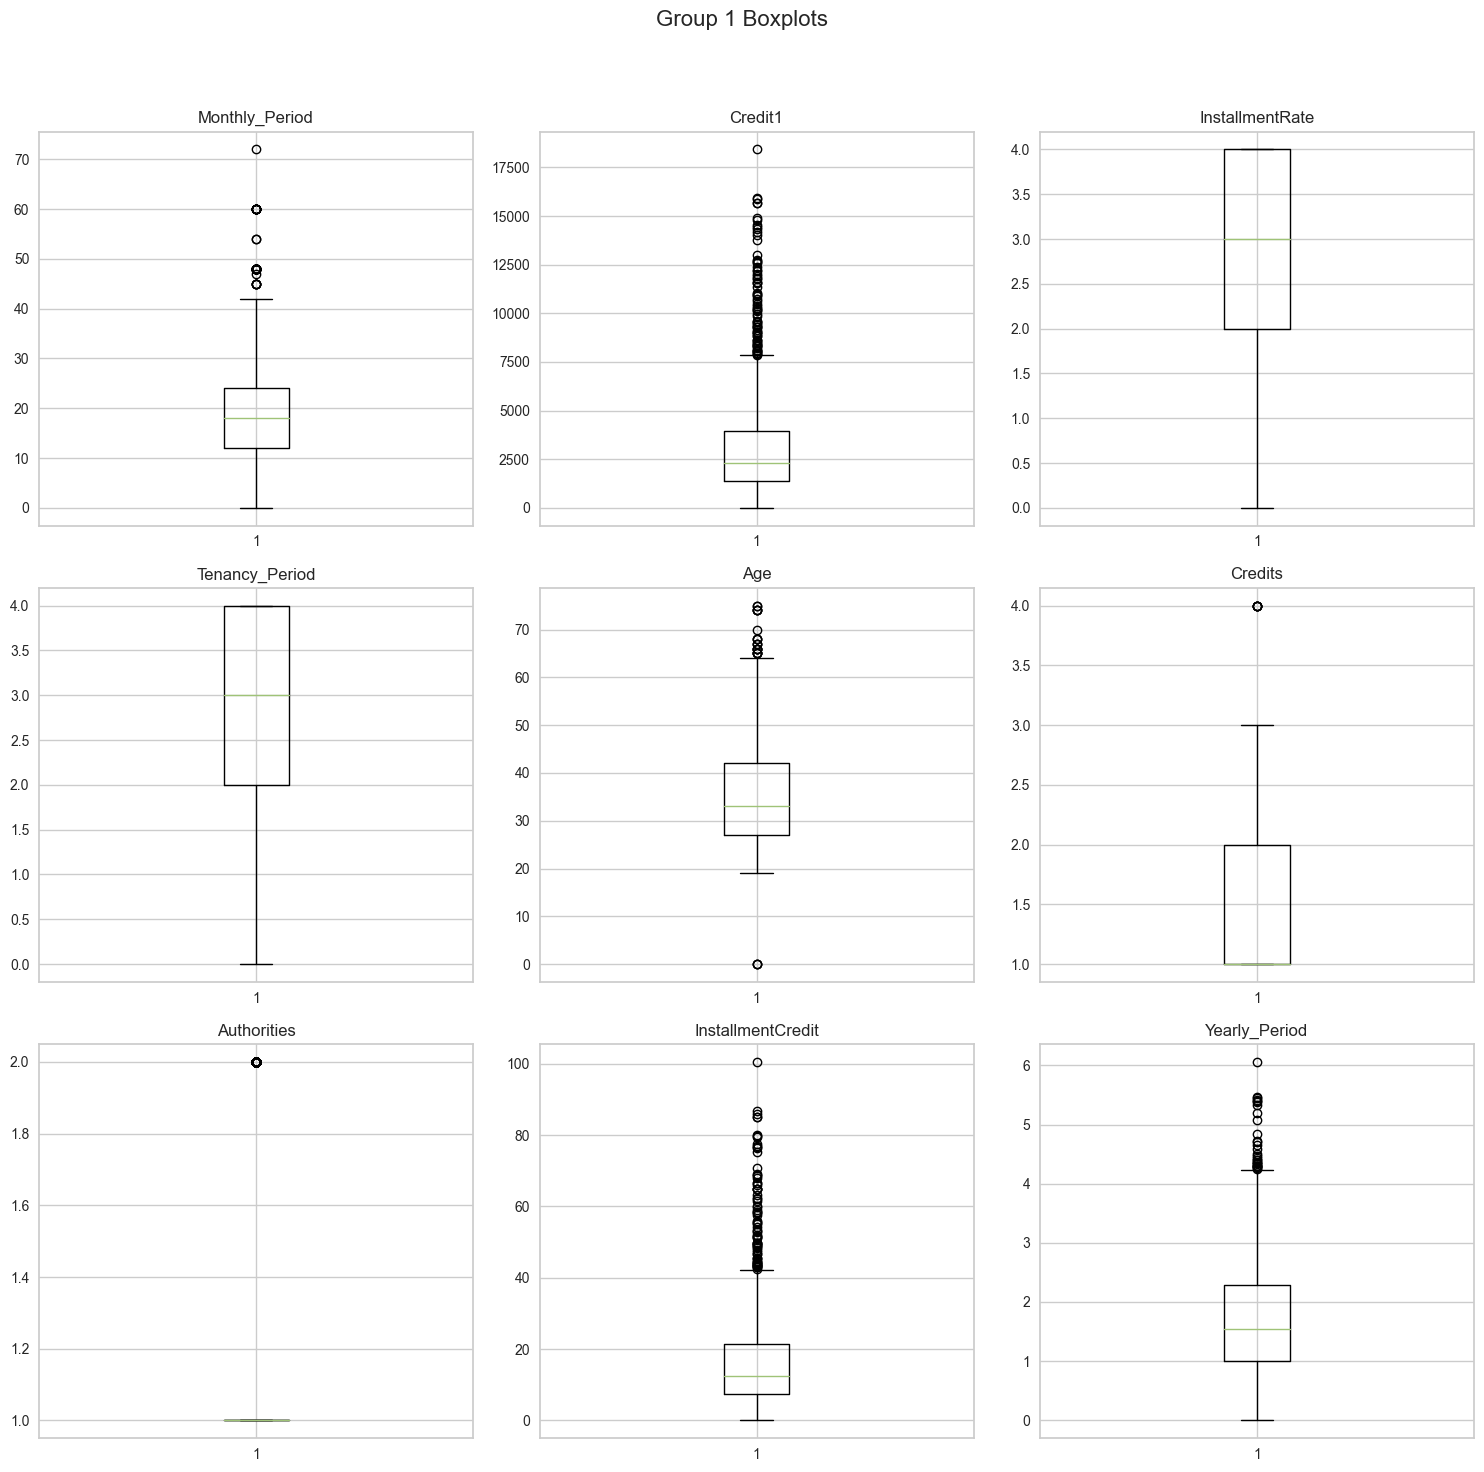

In [27]:
num_cols = len(num_columns)  
# TR = Sütunların toplam sayısını hesaplar 
# EN = Calculate the total number of numeric columns

num_plots_per_group = 9  
# TR = Her grupta çizilecek maksimum grafik sayısı
# EN = Maximum number of plots per group

num_groups = math.ceil(num_cols / num_plots_per_group)  
# TR = Grafik gruplarının sayısını belirler
# EN = Determine the number of plot groups


total_plots = min(num_cols, 9)
# TR = Toplamda sadece 9 grafik çizmek için
# EN = To plot only a total of 9 plots


for group in range(math.ceil(total_plots / num_plots_per_group)):
    cols_in_group = num_columns[group * num_plots_per_group:(group + 1) * num_plots_per_group]
    num_plots = len(cols_in_group)
    # TR = Her grup için grafiklerin düzenlenmesi
    # EN = For each group, arrange the plots

    rows = math.ceil(num_plots / 3)  
    # TR = 3 sütunlu satırları hesaplar
    # EN = Calculate rows for 3 columns
    
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))  
    # TR = Grafik düzeni oluşturur
    # EN = Create the subplot layout

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafiklerin tek eksende sıralanmasını sağlar
    # EN = Flatten the axes for easy indexing

    
    for i, col in enumerate(cols_in_group):
        axs[i].boxplot(df[col].dropna())
        axs[i].set_title(col)
        # TR = Her sütun için boxplot çizimi yapar
    # EN = Draw boxplot for each column

    
    for i in range(num_plots, len(axs)):
        axs[i].set_visible(False)
        # TR = Boş kalan eksenleri gizler
    # EN = Hide unused axes

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)  
    # TR = Grup başlığı
    # EN = Group title
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    # TR = Düzen ayarı
    # EN = Layout adjustment

    
    if sum(len(num_columns[g * num_plots_per_group:(g + 1) * num_plots_per_group]) for g in range(group + 1)) >= total_plots:
        break
        # TR = Toplam 9 grafiği çizdiğinde döngüyü sonlandırır
        # EN = Stop after plotting a total of 9 plots

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [28]:
df.head(1)

,Account1,Monthly_Period,History,Motive,Credit1,Account2,Employment_Period,InstallmentRate,Gender_Type,Sponsors,Tenancy_Period,Plotsize,Age,Plan,Housing,Credits,Post,Authorities,Phone,Expatriate,InstallmentCredit,Yearly_Period,Class
0,ad,12,c2,p3,2141,sacc2,time4,3,F0,G1,1,XL,35,PL3,H2,1.0,Jb3,1.0,yes,False,12.524685,0.586894,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Account1           1031 non-null   object 
 1   Monthly_Period     1031 non-null   int32  
 2   History            1031 non-null   object 
 3   Motive             1031 non-null   object 
 4   Credit1            1031 non-null   int32  
 5   Account2           1031 non-null   object 
 6   Employment_Period  1031 non-null   object 
 7   InstallmentRate    1031 non-null   int32  
 8   Gender_Type        1031 non-null   object 
 9   Sponsors           1031 non-null   object 
 10  Tenancy_Period     1031 non-null   int32  
 11  Plotsize           1031 non-null   object 
 12  Age                1031 non-null   int32  
 13  Plan               1031 non-null   object 
 14  Housing            1031 non-null   object 
 15  Credits            1031 non-null   float64
 16  Post               1031 

In [30]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


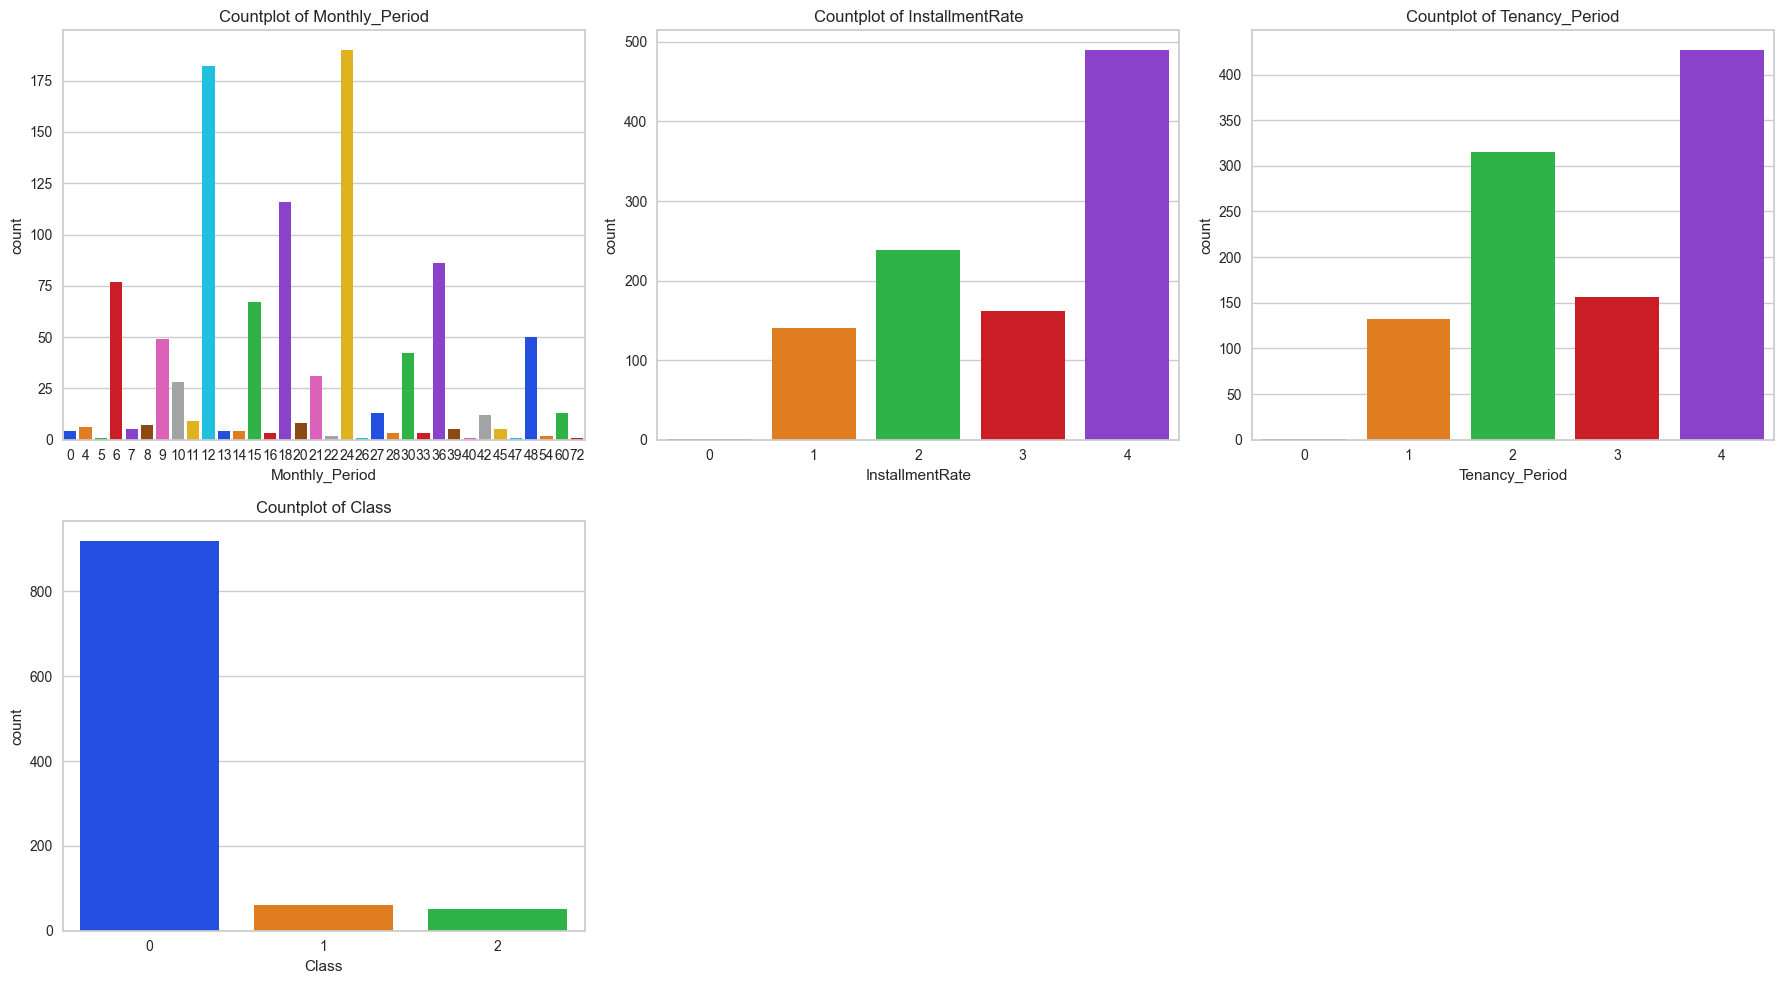

In [31]:
columns = [col for col in df.columns if col in int_columns and col not in ['Age', 'Credit1', 'Monthly Period']]
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in int_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in int_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.countplot(data=df, x=column, ax=axes[row, col],palette='bright')
    # TR = Kategorik verilerin her bir sınıfındaki gözlem sayısını görselleştirmek için kullanılır ve her kategorinin frekansını çubuklarla gösterir.
    # EN = It is used to visualize the number of observations in each class of categorical data and shows the frequency of each category with bars.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Countplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

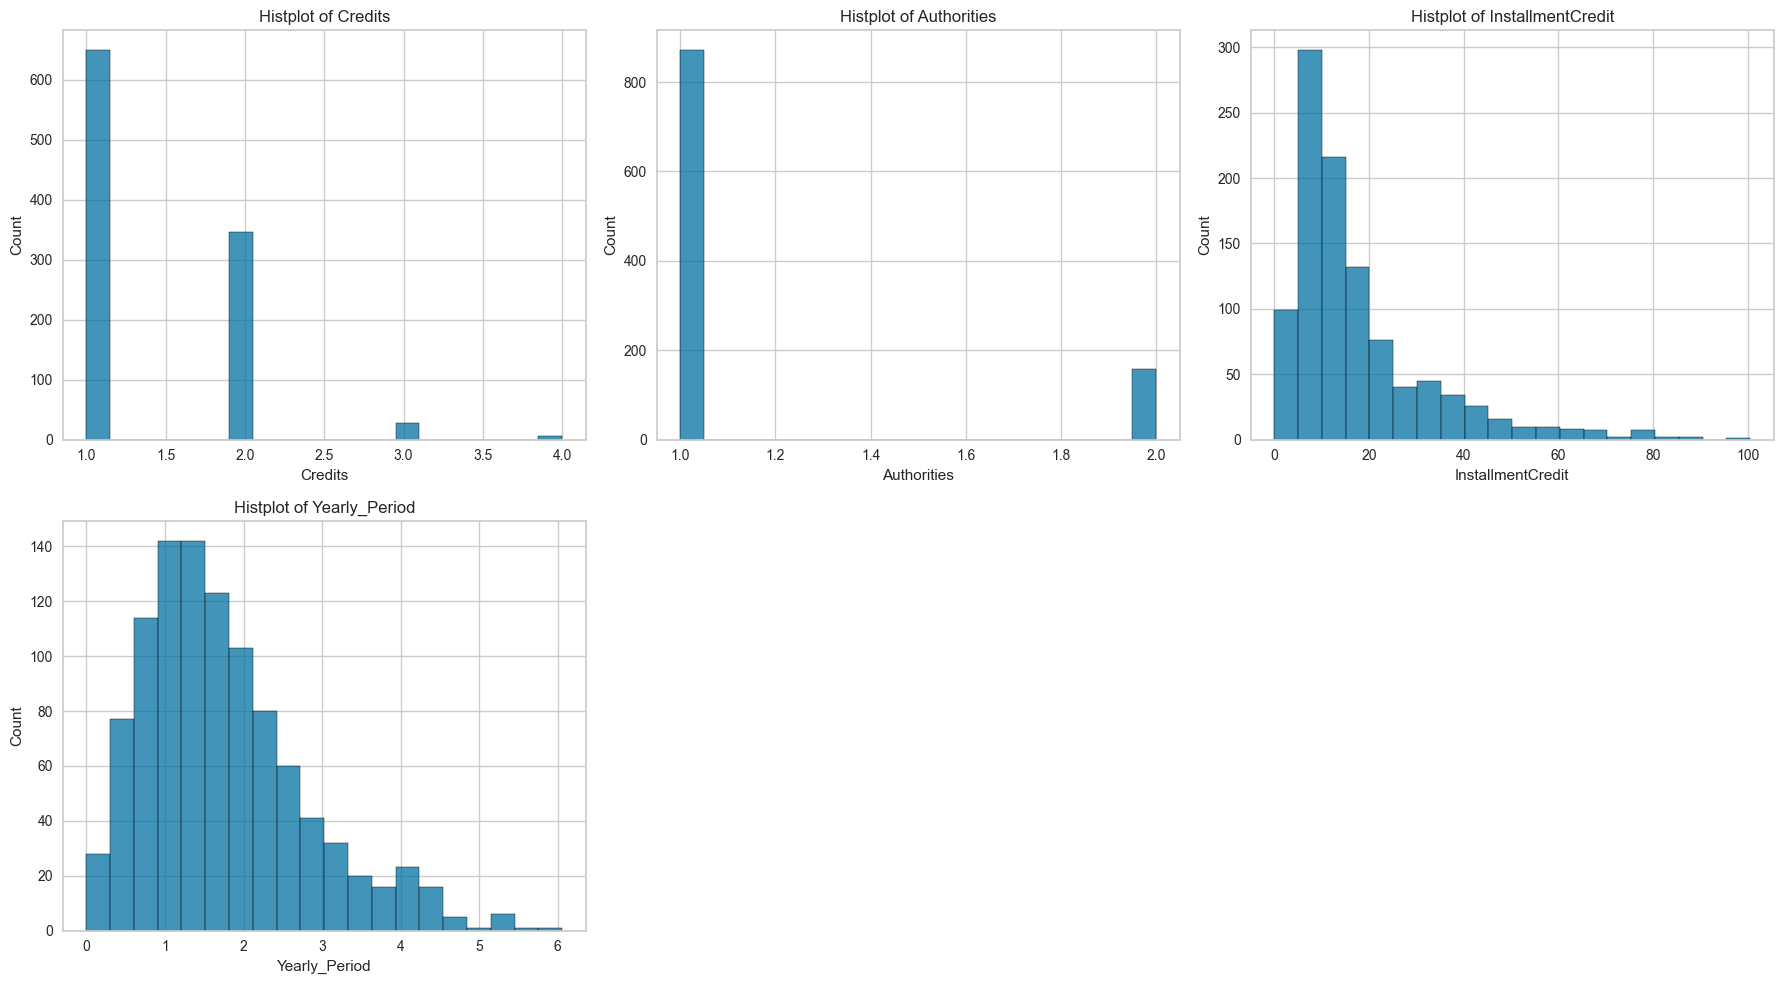

In [32]:
columns = [col for col in df.columns if col in float_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in float_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in float_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.histplot(data=df,x=column, bins=20, ax=axes[row, col])  
    # TR = Belirli bir değişkenin dağılımını görmek için kullanılır. Bu grafik, veri setindeki bir değişkenin frekanslarını veya yoğunluğunu analiz etmenizi sağlar.
    # EN = It is used to see the distribution of a particular variable. This plot allows you to analyze the frequencies or density of a variable in the dataset.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (bins=20) Veri ayarını 20 eşit genişlikte bölüme ayırmış olursunuz. 
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler
    
    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (bins=20) You will divide the data set into 20 equally wide sections.
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Histplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

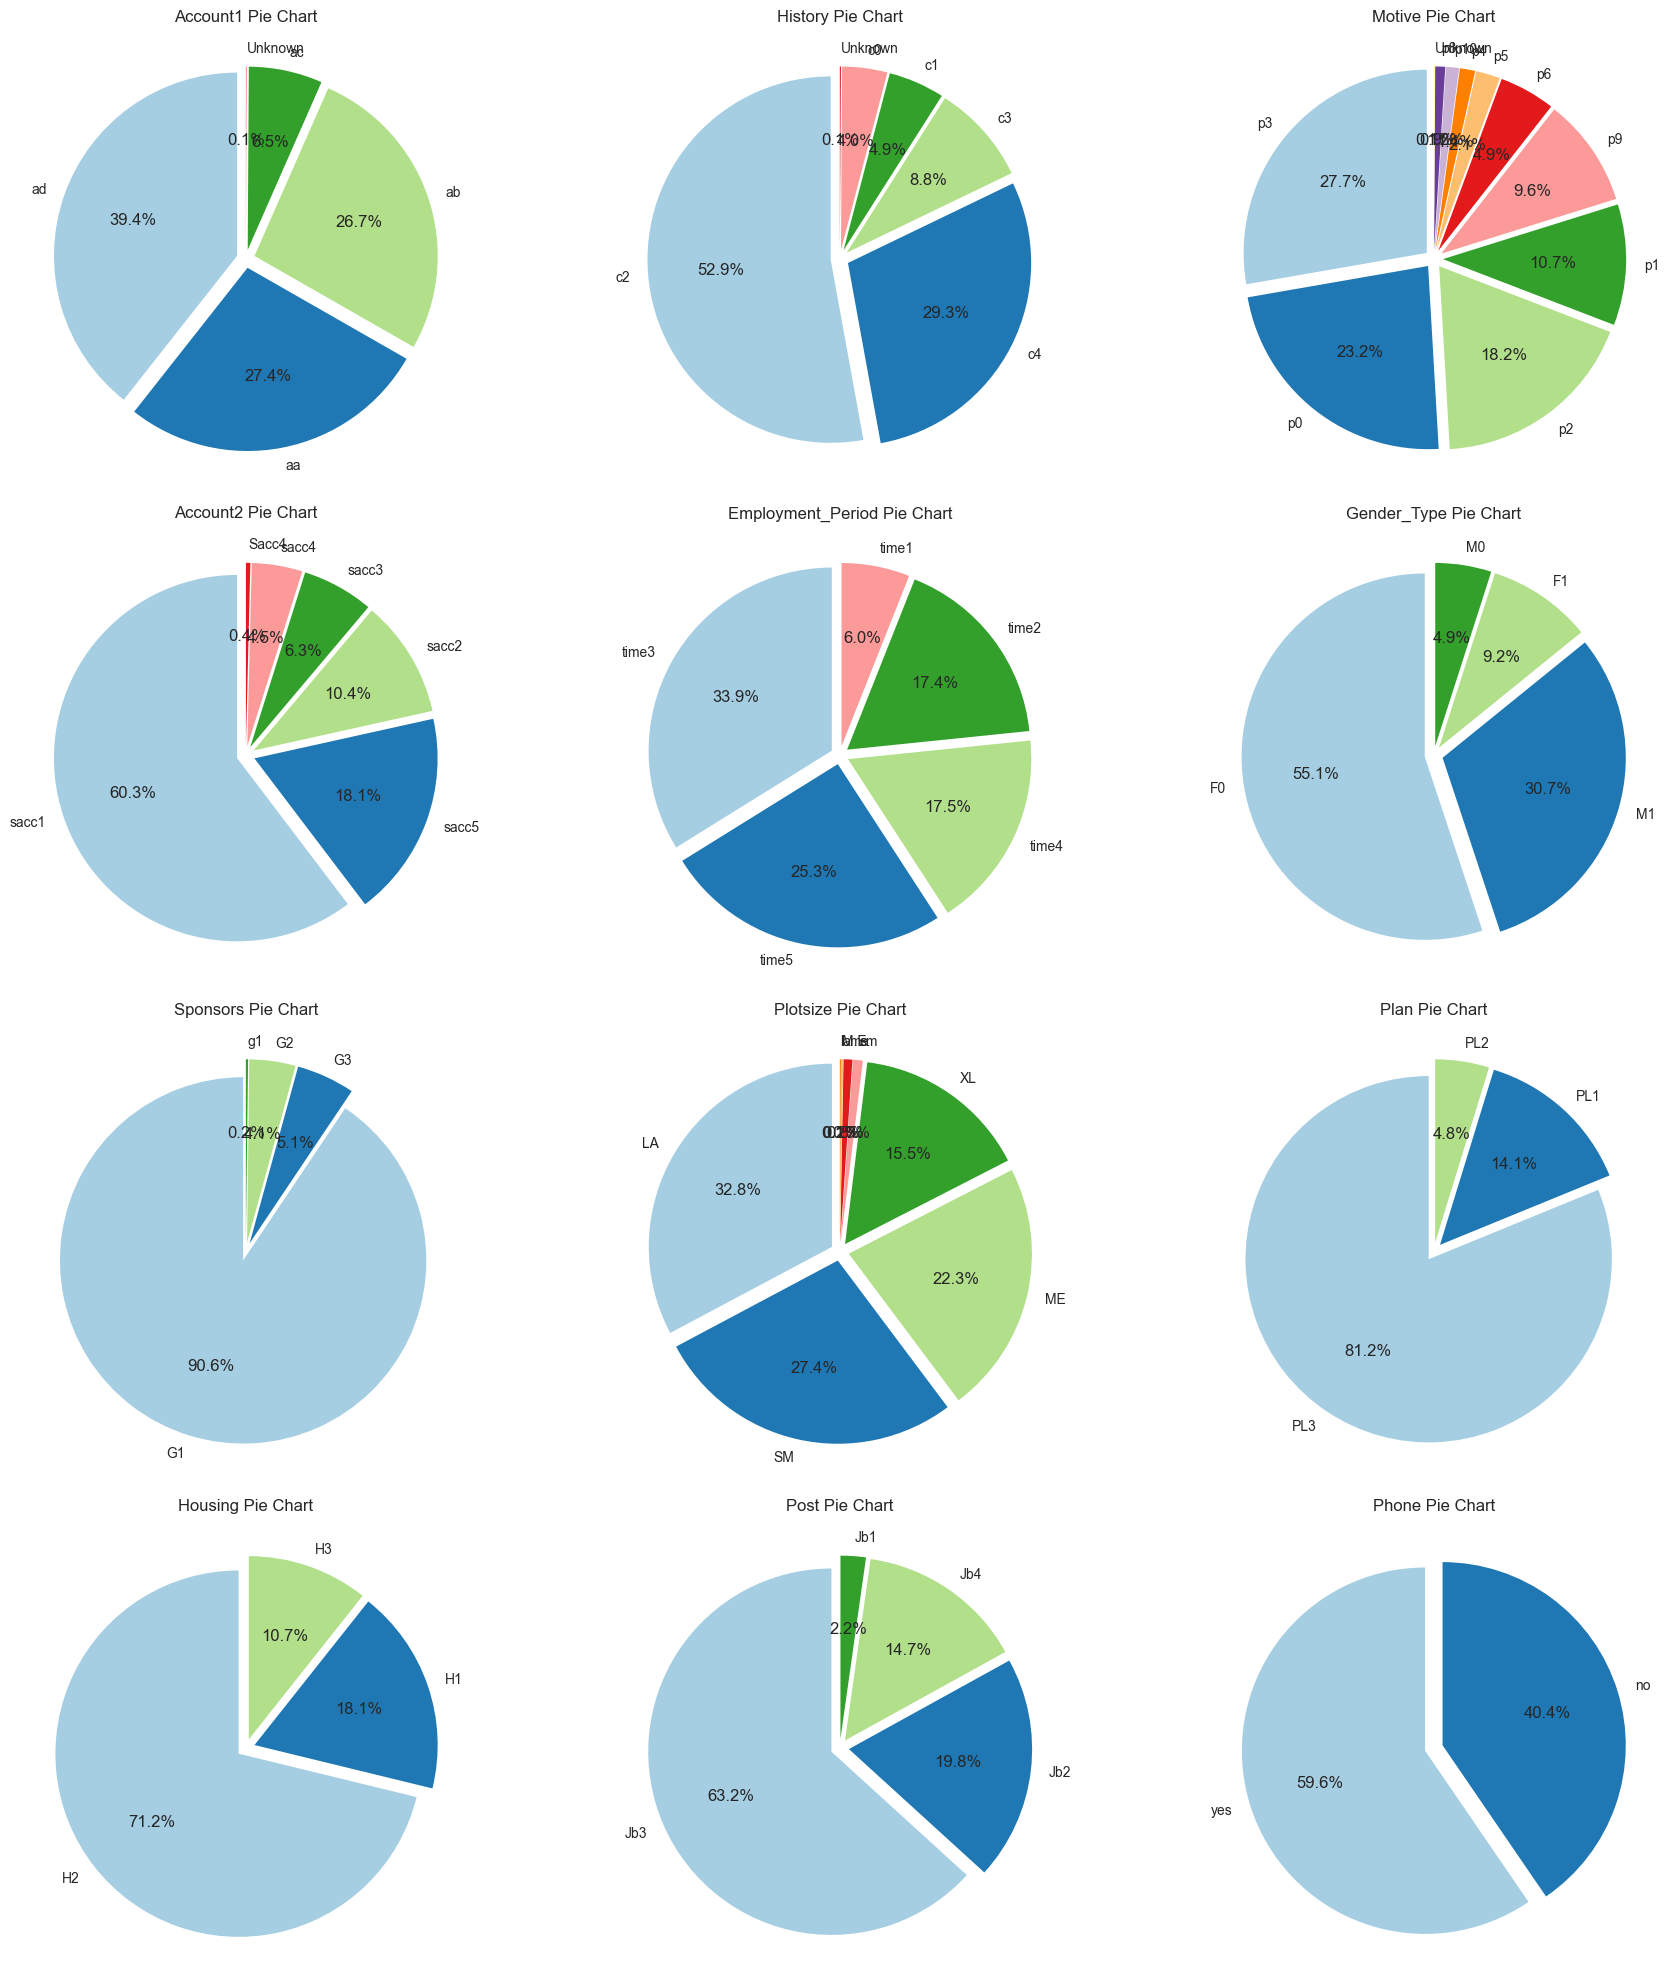

In [33]:
columns = [col for col in df.columns if col in object_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = Sütunların toplam sayısını hesaplar.
# EN = Calculates the total number of columns.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = 3 sütunlu ve yeterli sayıda satırlı bir alt grafik (subplot) oluşturur.
# EN = Creates subplots with 3 columns and enough rows to display all charts.

axes = axes.flatten()
# TR = Subplot dizisini düzleştirir, böylece kolayca indekslenebilir hale gelir.
# EN = Flattens the subplot array for easier indexing.

for i, column in enumerate(columns):
    # TR = Her sütun için bir döngü başlatır.
    # EN = Loops through each column.

    data = df[column].value_counts()
    # TR = Sütundaki kategorilerin frekanslarını alır.
    # EN = Gets the frequency of categories in the column.

    explode = [0.05] * len(data)
    # TR = Dilimlerin dışarı taşma miktarını belirler (patlama efekti için).
    # EN = Determines the explode amount for the slices (for an "exploding" effect).

    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, explode=explode)
    # TR = Pasta grafiği oluşturur; etiketler, yüzdeler ve renkler atanır.
    # EN = Creates the pie chart with labels, percentages, and colors.

    axes[i].set_title(f'{column} Pie Chart')
    # TR = Grafiğe başlık ekler.
    # EN = Adds a title to the chart.

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    # TR = Kullanılmayan alt grafikleri siler.
    # EN = Deletes unused subplots.

plt.tight_layout()
# TR = Grafiklerin yerleşim düzenini sıkılaştırarak güzel görünmesini sağlar.
# EN = Adjusts the layout for a tidy appearance.

plt.show()
# TR = Grafikleri gösterir.
# EN = Displays the charts.

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [34]:
x = df  # Veri setinden belirli sütunları seçeriz.

In [35]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Select categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', dtype=int)  # Remove sparse=False

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the encoded categorical features
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded categorical features with numerical features
x = pd.concat([df[numerical_columns].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False)
scaler = StandardScaler()
# encoder'ı ve scaler'ı pickle ile kaydet
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
x = scaler.fit_transform(x)


In [36]:
model = Sequential()  
# TR = Modeli oluşturmak için sıralı bir model tanımlanıyor  
# EN = A sequential model is defined to create the model

model.add(Dense(30, activation='relu'))  
# TR = İlk katman olarak 30 nöronlu ve 'relu' aktivasyonlu yoğun bir katman ekleniyor  
# EN = Adds a dense layer with 30 neurons and 'relu' activation as the first layer

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  
# TR = Çıktı katmanı olarak girdi boyutuna eşit nöronlu
# EN = Adds a dense output layer with neurons equal to input dimension

model.compile(optimizer='adam', loss='mean_squared_error')  
# TR = Model 'adam' optimizasyon yöntemi ve 'mean_squared_error' kayıp fonksiyonu ile derleniyor  
# EN = Compiles the model with 'adam' optimizer and 'mean_squared_error' loss function

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  
# TR = Erken durdurma, 'val_loss' izlenerek 10 epoch sabit kalırsa eğitim durdurulacak şekilde ayarlanıyor  
# EN = Early stopping is configured to stop training if 'val_loss' doesn't improve for 10 epochs

history=model.fit(x, x, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])  
# TR = Model, verinin %20'si doğrulama için ayrılarak, 100 epoch boyunca, 32'lik mini-batch'ler kullanılarak eğitiliyor  
# EN = Trains the model for 100 epochs using mini-batches of 32, with 20% of the data used for validation

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0029 - val_loss: 1.2602
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9660 - val_loss: 1.2466
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9648 - val_loss: 1.2384
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9504 - val_loss: 1.2324
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9883 - val_loss: 1.2289
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9511 - val_loss: 1.2261
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9578 - val_loss: 1.2239
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9483 - val_loss: 1.2227
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9330 - val_loss: 1.2222
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9342 - val_loss: 1.2207
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9431 - val_loss: 1.2194
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9

In [37]:
print("Eğitim Verisi Boyutu:", x.shape[1])

Eğitim Verisi Boyutu: 59


In [38]:
KM = KMeans(3)  
# TR = 3 kümeye ayırmak için KMeans kümeleme modeli oluşturuluyor  
# EN = A KMeans clustering model is created to divide the data into 3 clusters

KM.fit(x)  
# TR = Model, veriyi 5 kümeye ayırmak için eğitiliyor  
# EN = The model is trained to divide the data into 5 clusters

ValueError: could not convert string to float: 'ad'

In [ ]:
pred = KM.predict(x)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.
pred

In [ ]:
df['Cluster'] = pred  
# TR = Tahmin edilen küme etiketleri 'Cluster' adlı yeni bir sütun olarak veri çerçevesine ekleniyor  
# EN = The predicted cluster labels are added as a new column named 'Cluster' in the dataframe

print(df.head())  
# TR = Veri çerçevesinin ilk 3 satırı ekrana yazdırılıyor  
# EN = The first 3 rows of the dataframe are printed

In [ ]:
silhouette_score(x, pred)
# TR = silhouette_score her bir örneğin kendi kümesi içindeki diğer örneklere olan benzerliğini, diğer kümelerdeki örneklere olan benzerliğine kıyasla ölçer.
# EN = silhouette_score measures the similarity of each sample to other samples within its cluster compared to its similarity to samples in other clusters.

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D  
# TR = 3D grafikler oluşturmak için gereken araçlar içe aktarılıyor  
# EN = Imports tools needed for creating 3D plots

#colors = df['Class']  
# TR = Verideki 'Class' sütunu renkler olarak kullanılmak üzere atanıyor  
# EN = Assigns the 'Class' column from the data to be used as colors

#fig = plt.figure(figsize=(12, 12))  
# TR = 12x12 boyutlarında bir figür (grafik alanı) oluşturuluyor  
# EN = Creates a figure (plot area) with a size of 12x12

#ax = fig.add_subplot(111, projection='3d')  
# TR = 3D bir grafik ekseni ekleniyor  
# EN = Adds a 3D plot axis

#a = df['Age']  
# TR = 'Age' sütunu x ekseni verisi olarak atanıyor  
# EN = Assigns the 'Age' column as the x-axis data

#y = df['Credit1']  
# TR = 'Credit1' sütunu y ekseni verisi olarak atanıyor  
# EN = Assigns the 'Credit1' column as the y-axis data

#z = df['InstallmentRate']  
# TR = 'InstallmentRate' sütunu z ekseni verisi olarak atanıyor  
# EN = Assigns the 'InstallmentRate' column as the z-axis data

#scatter = ax.scatter(a, y, z, c=colors, cmap='viridis')  
# TR = 'viridis' renk haritası kullanılarak 3D bir dağılım grafiği çiziliyor  
# EN = Plots a 3D scatter plot using the 'viridis' colormap

#colorbar = plt.colorbar(scatter, ax=ax)  
# TR = Grafik için bir renk skalası ekleniyor  
# EN = Adds a colorbar to the plot

#colorbar.set_label('Class', fontsize=12, color='black')  
# TR = Renk skalasına 'Class' etiketi ekleniyor  
# EN = Labels the colorbar with 'Class'

#ax.set_xlabel('Age', color='black', fontsize=12)  
# TR = x eksenine 'Age' etiketi ekleniyor  
# EN = Labels the x-axis with 'Age'

#ax.set_ylabel('Credit1', color='black', fontsize=12)  
# TR = y eksenine 'Credit1' etiketi ekleniyor  
# EN = Labels the y-axis with 'Credit1'

#ax.set_zlabel('InstallmentRate', color='black', fontsize=12)  
# TR = z eksenine 'InstallmentRate' etiketi ekleniyor  
# EN = Labels the z-axis with 'InstallmentRate'

#plt.title('3D Renkli Noktalarla Dağılım Grafiği/Scatter Plot with 3D Colored Dots', fontsize=12, color='black')  
# TR = Grafik başlığı ekleniyor  
# EN = Adds a title to the plot

#plt.show()  
# TR = Grafik ekranda gösteriliyor  
# EN = Displays the plot


In [ ]:
wcss=[]  
# TR = WCSS (Within-Cluster Sum of Squares) değerlerini saklamak için boş bir liste oluşturuluyor  
# EN = Creates an empty list to store WCSS (Within-Cluster Sum of Squares) values

ss=[]  
# TR = Silhouette skoru değerlerini saklamak için boş bir liste oluşturuluyor  
# EN = Creates an empty list to store Silhouette score values

for i in range(2,10):  
# TR = 2 ile 9 arasında döngü oluşturuluyor (kümelerin sayısını belirlemek için)  
# EN = Loops through numbers from 2 to 9 (for determining the number of clusters)

    model=KMeans(i)  
    # TR = i sayısında kümeleri olan bir KMeans modeli oluşturuluyor  
    # EN = Creates a KMeans model with i clusters

    model=model.fit(x)  
    # TR = Model, veriler üzerinde eğitiliyor  
    # EN = Fits the model on the data

    pred=model.predict(x)  
    # TR = Verilere göre tahminler yapılıyor (küme etiketleri)  
    # EN = Makes predictions on the data (cluster labels)

    ss1=silhouette_score(x,pred)  
    # TR = Silhouette skoru hesaplanıyor  
    # EN = Calculates the Silhouette score

    ss.append(ss1)  
    # TR = Hesaplanan Silhouette skoru 'ss' listesine ekleniyor  
    # EN = Appends the calculated Silhouette score to the 'ss' list

    print(ss1)  
    # TR = Hesaplanan Silhouette skoru ekrana yazdırılıyor  
    # EN = Prints the calculated Silhouette score

    wcss.append(model.inertia_)  
    # TR = Modelin WCSS değeri 'wcss' listesine ekleniyor  
    # EN = Appends the model's WCSS value to the 'wcss' list


In [ ]:
#plt.plot(range(2,10),wcss);
# TR = Hemen Yukarıdaki satırda yapılan kodun tablosu.
# EN = Table of the code made in the line just above.

In [ ]:
#vis=KElbowVisualizer(model,k=(2,10))
# TR = Bu yöntem, özellikle k-means gibi kümeleme algoritmalarında en uygun küme sayısını belirlemek için oldukça faydalıdır.
# EN = This method is especially useful for determining the optimal number of clusters in clustering algorithms such as k-means.
#vis.fit(x)
#vis.show();

### <font color=#0fffff> Hiyerarşik kümeleme - Hierarchical Clustering

In [ ]:
#data=linkage(x,method='ward', metric='euclidean')

In [ ]:
#plt.figure(figsize=(25,6))
#dendrogram(data);

In [ ]:
x=df[['Class','Cluster']]

In [ ]:
ax=sns.countplot(data=x,x='Cluster')
ax.bar_label(ax.containers[0]);

In [ ]:
cols = list(x.columns)  
# TR = Veri çerçevesindeki sütun adlarını listeye alıyor  
# EN = Converts the column names of the dataframe to a list

cols.insert(0, cols.pop(cols.index('Cluster')))  
# TR = 'Cluster' sütununu listenin başına taşıyor  
# EN = Moves the 'Cluster' column to the beginning of the list

x = x[cols]  
# TR = Veri çerçevesinin sütun sıralamasını güncelliyor  
# EN = Updates the column order of the dataframe


In [ ]:
x[x['Cluster']==0]
# TR = vis'de çıkan sonuca göre oluşturacağız.
# EN = We will create it according to the result in vis.

In [ ]:
x[x['Cluster']==1]

In [ ]:
x[x['Cluster']==2]

In [ ]:
pickle.dump(model,open('Veri.pkl','wb'))